# Homework 4: Classification using sklearn  

The objective of this homework is to gain experience with using sklearn, a versatile Python toolbox for machine learning. The following code is copied from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. You should be able to run the code without error messages.

/Users/gavinkoma/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gavinkoma/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gavinkoma/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


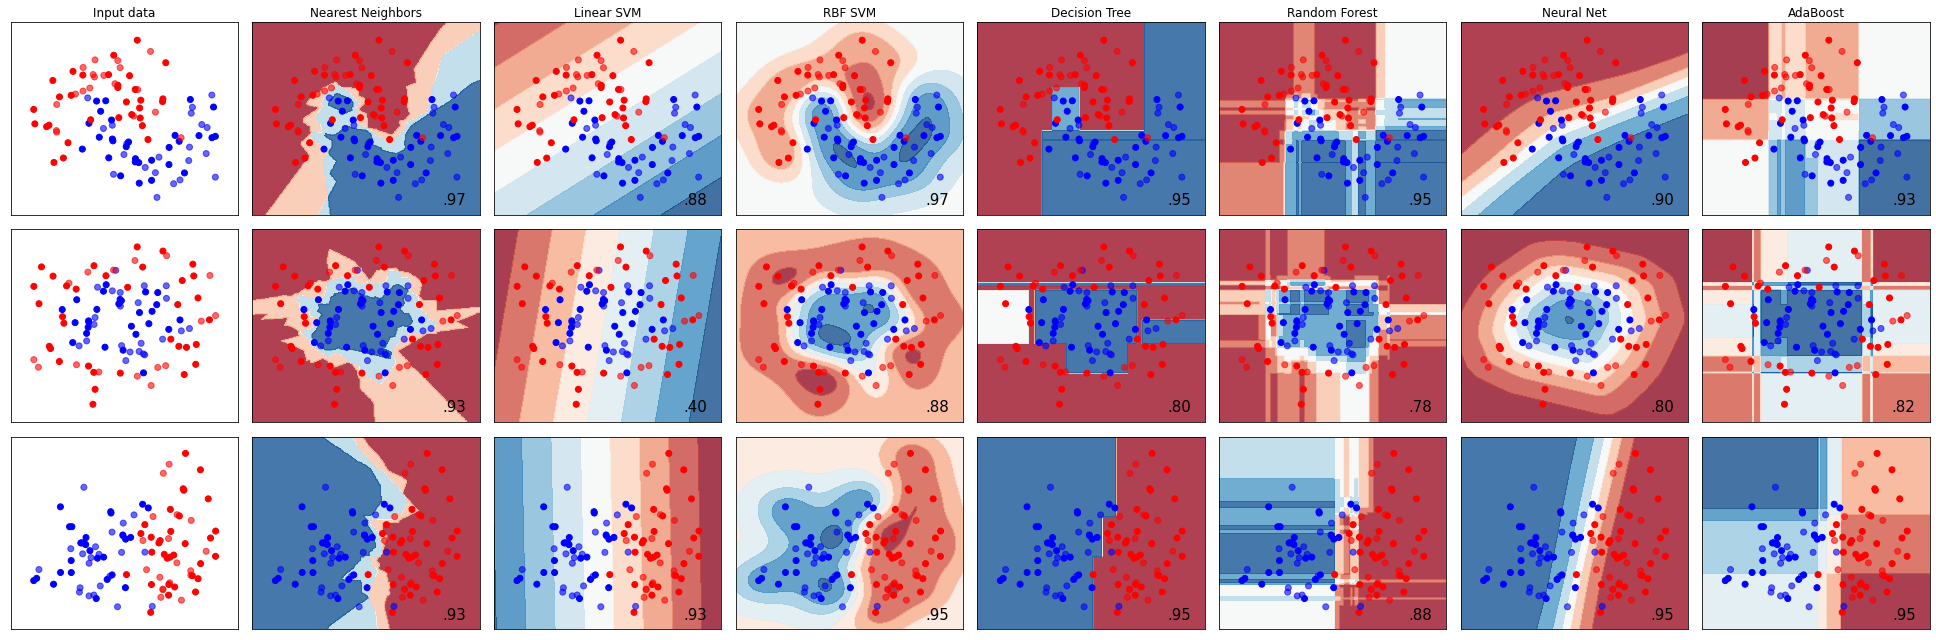

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

The code above trained several types of classifiers on 3 synthetic data sets. Among them are kNN and feedforward neural networks. There are also some other algorithms we will introduce during the course. At the moment, you do not have to worry what they are and how they work. 

**Question 1**. Study the code and try to understand what each line does. In particular, pay attention to how easy it is to train predictors of different types. Run the code. You should be able to see a nice display demonstrating performance of different algorithms on 3 data sets.

**Question 2**. Train all the listed classifiers on Iris data (you can load it using *iris = sklearn.datasets.load_iris()*) and test their accuracy. Report and discuss the results

**Question 3**. Play with the hyperparameters of each of the algorithms. Try to improve the accuracy on the test data. 

**Question 4**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Adult. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.


**Question 1**

This question does not specifically ask for any written parts but after going through the code I thought that it might be helpful to write out a part that I was slightly confused with. Therefore, I decided to go through the code which specifies classifier information and go over the documentation to gain a better understanding of what values were needed in each classifier and why we chose them. 

1. KNeighborsClassifier(3) - Here we define how many neighbors we want to look at. This is what we did for our homework the previous week so I will not dive further into this classifier. 
2. SVC(kernel="linear", C=0.025) - kernel when not specified defaults to rbf, by defining our kernel we ensure that svc acts linearly. Our C value is a regularization value that must be positive.
3. SVC(gamma=2, C=1) - we did not specify the kernel here, so now we are using the default rbf kernel of SVC. Gamma is the coefficient for rbf, poly, and sigmoid. Once again, our C is the regularization parameter. It is important to keep in mind that regularization strength is inversely proportional to C and MUST be positive. 
4. DecisionTreeClassifier(max_depth=5) - we define the max depth of our decision tree. If we do not define the depth of our nodes, then the tree will continue until all leaves are pure. This is overkill in most cases.
5. RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1) - random forest also requires a max depth but random forest is made up of trees, so we have to specify the amount of trees that we want in our forest, here we choose 10. Max features is defined as 1 and is the number of features to look at when looking for the best split. 
6. MLPClassifier(alpha=1) - MLP is multilayer perceptron (which we just discussed briefly in class) and the model optimizes the log-loss function using stochastic gradient descent. Alpha designates the strength of our L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.
7. AdaBoostClassifier()] - AdaBoost is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but intentionally uses weights of incorrectly classified instance to make the subsequent classifiers focus on more difficult cases. This is kind of confusing to me but I’ve watched a few YouTube videos in regard to the topic now and it is starting to make some degree of sense.

I chose to not dive further into the other code primarily because it was performed already during last homework. For the KNeighbors assignment we used the iris data and from here split the data, trained, and toyed with the parameters that are given in the loop. Since, I already have a good understanding of how this works, I elected to not explore topics further in this section.

**Question 2**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



iris = load_iris()

h = 0.02 #keep the same step size in our mesh

names = ["Nearest Neighbors", "Linear SVM","RBF SVM",
         "Decision Tree","Random Forest","Neural Net","AdaBoost"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel = "linear",C=0.03),
    SVC(gamma=5,C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(max_depth=7,n_estimators=10,max_features=1),
    MLPClassifier(alpha=4),
    AdaBoostClassifier()
    ]

scores = []

xtrain,xtest,ytrain,ytest = train_test_split(iris.data,iris.target,train_size=.75)

# iterate over classifiers

for name, clf in zip(names, classifiers):
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(score)
    
print(scores)

[1.0, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0, 0.9736842105263158]


/Users/gavinkoma/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The scores when using the iris data instead of the pre-generated data are notably higher. This makes sense because the data generated only has 2 features (which is why we are able to make our plots on two dimensional plots. However, the Iris data has four features and three different classifications --> therefore, we cannot plot our data. This would be four-dimensional data. However, our accuracy increases notably because we have more features to classify our data with instead of two which explains our notably higher accuracy right off the bat. 

**Question 3**

Increasing the KNeighborsClassifier from 3 to 5 gives us marginally better accuracy. 

For SVClinear, increasing our regularization value of C from 0.025 to 0.03 will result in a slightly better accuracy. 

We can increase our accuracy of SVCrbf by increasing our gamma value to 5 and leaving our regularization value the same (C=1). This actually gives us an accuracy of nearly 100%

When we decrease the max depth for DecisionTree and for random forest, we see an increase in the accuracy values of both. 

A higher alpha value for MLPClassifier is also giving us a higher accuracy value. 

It is possible though, that during all of these parameter alterations, that we have overfit our algorithms. To further test this, it would be beneficial to train our network and see how new data affects our algorithm to determine if overfitting did take place. 100% accuracy is always nice to hear about but in practice, 100% accuracy is probably the result of overfitting. 


**Question 4**

<AxesSubplot:title={'center':'hour'}, xlabel='income'>

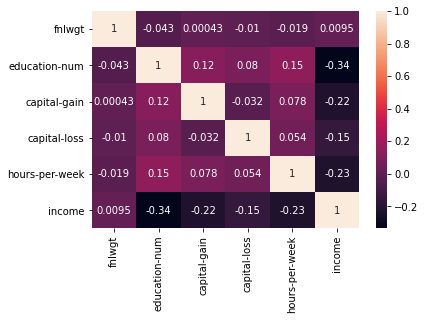

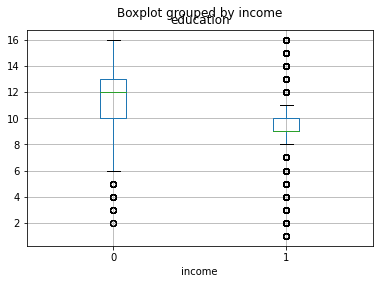

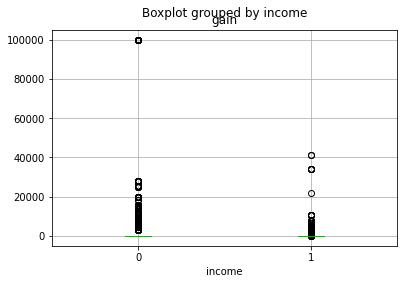

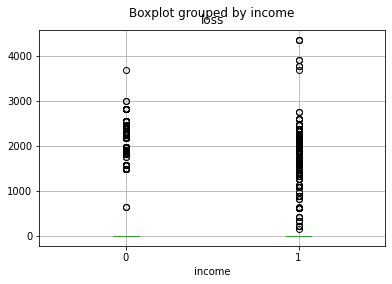

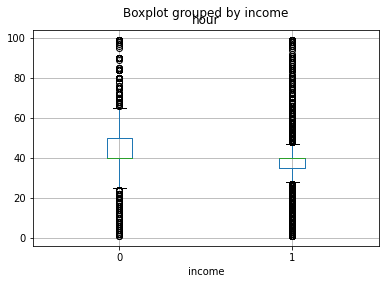

In [1]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 15 12:09:02 2022

@author: gavinkoma
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

data1 = pd.read_csv("adult.data",sep=',',header = None)
data2 = pd.read_csv("adult.names",sep=';',header = None)
data3 = pd.read_csv("adult.test",sep=',')

combined = [data1,data2,data3]
combined = pd.concat(combined)

header = ['age','workclass','fnlwgt','education','education-num','marital-status',
          'occupation','relationship','race','sex','capital-gain','capital-loss',
          'hours-per-week','native-country','income','cross/val']

combined.columns=header

# income_types = ('<=50K','>50K')
# income_df = pd.DataFrame(income_types,columns = ['income'])

# income_df['income'] = income_df['income'].astype('category')

# income_df['Income_Types_Cat'] = income_df['income'].cat.codes
# income_df
#le = LabelEncoder()
#combined.income = le.fit_transform(combined.income)
combined.income = combined.income.apply(lambda x: 1 if x == " <=50K" else 0)


#data is entered and combined so life is good rn 
h = 0.02

names = ["Nearest Neighbors", "Linear SVM","RBF SVM",
         "Decision Tree","Random Forest","Neural Net","AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

#what do we want to look at? 
#we have so many values here and I dont think the goal is to look at them all 
#so maybe we should look at income??? 
#correlation plot?

correlation = combined.corr()
sns.heatmap(correlation,annot=True)



#our correlation graphs shows values for education num
#capital gain, capital loss, and hours per week
#so lets make other graphs that compare these with income? 

X,y = make_classification(n_features=2, n_redundant=0,n_informative=2,
                          random_state=1,n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X,y)

#we should set our datasets now so we can use them for iterations later
educa_income = pd.DataFrame().assign(education=combined['education-num'], income=combined['income'])
gain_income = pd.DataFrame().assign(gain=combined['capital-gain'], income=combined['income'])
loss_income = pd.DataFrame().assign(loss=combined['capital-loss'], income=combined['income'])
hour_income = pd.DataFrame().assign(hour=combined['hours-per-week'], income=combined['income'])


datasets = [educa_income,gain_income,loss_income,hour_income]

educa_income.boxplot(by='income',column = ['education'])
gain_income.boxplot(by='income',column=['gain'])
loss_income.boxplot(by='income',column=['loss'])
hour_income.boxplot(by='income',column=['hour'])

